Nerdy Personality Attributes Scale (NPAS)
- 응답자의 성격이 nerd로 정의된 사람들의 평균과 비슷한지, 아니면 일반 사람들의 평균과 비슷한지 측정하는 테스트
- 26개 질문
- https://openpsychometrics.org/tests/NPAS/

### 칼럼 설명
- Q1~Q26: 질문
    - 대답: 1 ~ 5
- country: 응답자의 국적
- introelapse: intro에서 소요된 시간
- testelapse: test에서 소요된 시간
- surveyelapse: survey에서 소요된 시간
- TIPI1~TIPI10: 본인을 나타내는 단어 
    - 대답: 1(전혀 아니다) ~ 7(매우 그렇다)
- VCL1~VCL16: 지식 수준?, 정확한 의미를 아는 단어 체크 
    - 대답: 1(안다), 0 (모른다)
- education: 교육 수준
- urban: 거주 지역
- gender: 성별
- engnat: 영어가 모국어인지의 여부
- age: 나이
- hand: 왼손잡이 or 오른손잡이
- religion: 종교
- orientation: 지남력 (현재 자신이 놓여 있는 상황을 올바르게 인식하는 능력) https://www.amc.seoul.kr/asan/healthinfo/easymediterm/easyMediTermDetail.do?dictId=3798
- voted: 투표에 참여한 횟수
- married: 결혼한 횟수
- familisize: 가족 구성원 수
- ASD: 자폐스펙트럼장애 정도
- nerdiness: *타겟변수, nerdiness 정량화하는 프로젝트, nerd인지 아닌지
https://educalingo.com/ko/dic-en/nerdiness

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# train.head()

In [4]:
# test.head()

In [5]:
# train.info

In [6]:
# train.isnull().sum()

In [7]:
# test.info()

In [8]:
x_train = train.copy()
x_train.drop('nerdiness', axis=1, inplace = True)
y_train = train['nerdiness']


In [9]:
len(x_train.index)

15000

In [10]:
len(y_train.index)

15000

In [11]:
dataset = [x_train, test]


## Q

In [12]:
Answers = []
for i in range(1,27):
    Answers.append('Q'+str(i))
print(Answers)
#Answers = train.iloc[:, 1:27]

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']


<AxesSubplot:>

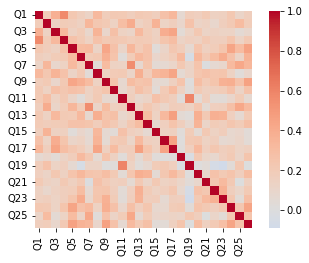

In [13]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

양의 상관관계로 나와서 데이콘에서 바꿔놓은 것으로 간주

*   항목 추가
*   항목 추가


->부호 변경 하지 않음

In [14]:
#결측값 확인
x_train[Answers].isnull().sum()

Q1     41
Q2     69
Q3     50
Q4     71
Q5     38
Q6     48
Q7     76
Q8     48
Q9     56
Q10    72
Q11    59
Q12    67
Q13    40
Q14    36
Q15    45
Q16    33
Q17    37
Q18    63
Q19    53
Q20    45
Q21    39
Q22    38
Q23    50
Q24    61
Q25    44
Q26    68
dtype: int64

In [15]:
#결측값 대체
# train[Answers] = train[Answers].fillna(train[Answers].mean())
# test[Answers] = test[Answers].fillna(test[Answers].mean())
for data in dataset:
    data[Answers] = data[Answers].fillna(data[Answers].mean())


In [16]:
#다시 결측값 확인
x_train[Answers].isnull().sum()

Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
Q11    0
Q12    0
Q13    0
Q14    0
Q15    0
Q16    0
Q17    0
Q18    0
Q19    0
Q20    0
Q21    0
Q22    0
Q23    0
Q24    0
Q25    0
Q26    0
dtype: int64

In [17]:
test[Answers].isnull().sum()

Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
Q11    0
Q12    0
Q13    0
Q14    0
Q15    0
Q16    0
Q17    0
Q18    0
Q19    0
Q20    0
Q21    0
Q22    0
Q23    0
Q24    0
Q25    0
Q26    0
dtype: int64

In [18]:
for data in dataset:
    data['Q_score'] = data[Answers].sum(axis=1)

In [19]:
#질문별로 비율 계산하여 새로운 피처 생성
#Ancoms = list(combinations(Answers, 2))

#for data in dataset:
  #for a,b in Ancoms:
    #data['mach_%s_dv_%s'%(a,b)] = data[a]/data[b]



In [20]:
test

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,Q_score
0,0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,...,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0,109.0
1,1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,...,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0,112.0
2,2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,...,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0,109.0
3,3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,...,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0,98.0
4,4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,...,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,...,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0,108.0
35448,35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,...,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0,115.0
35449,35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0,119.0
35450,35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,...,1.0,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0,104.0


In [21]:
#Tatic/ Morality/ View로 분류하여 새로운 피처 생성
for data in dataset:
    data['T'] = data['Q1']+data['Q2']+data['Q3']+data['Q7']+data['Q10']+data['Q12']+data['Q15']+data['Q16'] 
    data['V'] = data['Q4']+data['Q5']+data['Q8']+data['Q11']+data['Q13']+data['Q20']
    data['M'] = data['Q9']+data['Q19']

In [22]:
#분산 피처 생성
for data in dataset:
    data['Mach_var'] = data[Answers].var(axis = 1)

In [23]:
#기존 Q drop 
for data in dataset:
    data.drop([('Q'+str(i) )for i in range(1,27)], axis = 1, inplace = True)

In [24]:
x_train

,index,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,...,orientation,voted,married,familysize,ASD,Q_score,T,V,M,Mach_var
0,0,USA,3,553,6,4.0,3.0,5.0,1.0,3.0,...,4.0,2.0,1.0,4.0,2.0,95.0,34.0,26.0,6.0,3.435385
1,1,USA,5,85,120,4.0,2.0,3.0,5.0,3.0,...,1.0,1.0,2.0,4.0,2.0,85.0,26.0,21.0,4.0,1.964615
2,2,NLD,9,108,100,1.0,2.0,3.0,1.0,5.0,...,2.0,2.0,3.0,4.0,2.0,96.0,32.0,21.0,9.0,1.981538
3,3,USA,2,121,139,3.0,3.0,3.0,4.0,5.0,...,1.0,2.0,1.0,2.0,2.0,91.0,27.0,21.0,7.0,0.900000
4,4,ITA,3,640,216,3.0,3.0,4.0,4.0,4.0,...,1.0,2.0,1.0,1.0,2.0,90.0,31.0,18.0,7.0,0.978462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,USA,12,103,161,2.0,2.0,4.0,3.0,3.0,...,3.0,2.0,1.0,3.0,2.0,87.0,31.0,19.0,5.0,1.355385
14996,14996,USA,31,106,179,3.0,2.0,4.0,5.0,4.0,...,1.0,1.0,2.0,3.0,2.0,105.0,35.0,22.0,5.0,1.318462
14997,14997,USA,17,103,168,1.0,3.0,2.0,5.0,1.0,...,2.0,1.0,1.0,3.0,1.0,120.0,39.0,29.0,8.0,0.566154
14998,14998,USA,14,68,109,1.0,1.0,3.0,5.0,4.0,...,4.0,2.0,2.0,2.0,1.0,107.0,35.0,20.0,10.0,1.626154


In [25]:
test

,index,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,...,orientation,voted,married,familysize,ASD,Q_score,T,V,M,Mach_var
0,0,CHL,9,114,243,2.0,4.0,3.0,4.0,3.0,...,4.0,1.0,1.0,3.0,2.0,109.0,30.0,26.0,8.0,0.721538
1,1,USA,18,107,206,1.0,4.0,3.0,5.0,4.0,...,5.0,2.0,1.0,5.0,2.0,112.0,34.0,28.0,10.0,0.781538
2,2,IDN,4,87,191,3.0,3.0,4.0,3.0,4.0,...,5.0,2.0,1.0,3.0,2.0,109.0,36.0,23.0,7.0,1.521538
3,3,AUS,2409,155,258,1.0,4.0,3.0,3.0,4.0,...,2.0,2.0,1.0,3.0,2.0,98.0,32.0,24.0,9.0,1.384615
4,4,PHL,24,163,289,3.0,3.0,3.0,5.0,5.0,...,5.0,2.0,1.0,2.0,2.0,106.0,38.0,26.0,6.0,1.753846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,35447,USA,10,200,254,3.0,5.0,5.0,5.0,5.0,...,4.0,2.0,1.0,3.0,2.0,108.0,34.0,26.0,8.0,0.615385
35448,35448,GBR,504,136,155,3.0,3.0,5.0,5.0,3.0,...,5.0,2.0,1.0,2.0,2.0,115.0,35.0,28.0,10.0,0.973846
35449,35449,USA,27,121,191,1.0,5.0,4.0,3.0,4.0,...,5.0,1.0,1.0,2.0,2.0,119.0,40.0,28.0,10.0,1.293846
35450,35450,CAN,3,58,105,3.0,5.0,5.0,1.0,5.0,...,1.0,2.0,1.0,NaN,2.0,104.0,31.0,21.0,10.0,2.880000


## country

- nerdiness와는 무관하다고 판단되어 drop함

In [26]:
x_train = x_train.drop(columns=['country'], axis = 1)
test = test.drop(columns = ['country'], axis = 1)

## elapse

In [27]:
elapse = ['introelapse', 'testelapse', 'surveyelapse']

In [28]:
# plt.figure(figsize=(8,6))
# sns.countplot(data=train, x='introelapse', hue = train['nerdiness'])

In [29]:
# sns.distplot(train['introelapse'], rug=True)

In [30]:
# elapse_correlations = train[elapse].corr(method = 'spearman')
# sns.heatmap(elapse_correlations, cmap="coolwarm", square=True, center=0)

intro는 test와 survey와 상관관계가 없다고 판단 

In [31]:
#걸린시간 합
x_train['elapse_sum'] = x_train['testelapse']+x_train['surveyelapse']
test['elapse_sum'] = test['testelapse']+test['surveyelapse']


In [32]:
#비율도 만들어보기..
x_train['test_dv_survey']=x_train['testelapse']/x_train['surveyelapse'] 
test['test_dv_survey']=test['testelapse']/test['surveyelapse'] 


## TIPI

##### The TIPI items were rated "I see myself as:" _____ such that

- TIPI1	Extraverted, enthusiastic. :외향적, 열정적
- TIPI2	Critical, quarrelsome. :비판적, 시비걸기
- TIPI3	Dependable, self-disciplined. :신뢰할 수 있는, 자신의 규칙이 있는
- TIPI4	Anxious, easily upset. :불안한, 쉽게 우울한
- TIPI5	Open to new experiences, complex. :새 경험, 복잡성에 대한 열려있는
- TIPI6	Reserved, quiet. :말수가 적고 조용한
- TIPI7	Sympathetic, warm. :동정심 많은, 따뜻한
- TIPI8	Disorganized, careless. :무질서한, 부주의한
- TIPI9	Calm, emotionally stable. :침착한, 정서적으로 안정된
- TIPI10	Conventional, uncreative. :틀에 박힌, 창의적이지 않은

<AxesSubplot:>

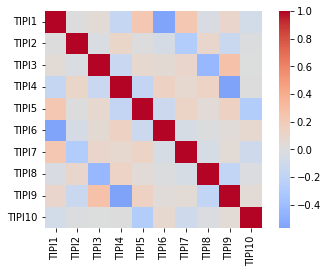

In [33]:
TIPI = []
for i in range(1,11):
    TIPI.append('TIPI'+str(i))

TIPI_correlations = train[TIPI].corr(method = 'spearman')
sns.heatmap(TIPI_correlations, cmap="coolwarm", square=True, center=0)

(1) TIPI 결측치 평균으로 대체

In [34]:
for data in dataset:
    data[TIPI] = data[TIPI].fillna(data[TIPI].mean())

In [35]:
for data in dataset:
    count=data[TIPI].isnull().sum()
    print(count)

TIPI1     0
TIPI2     0
TIPI3     0
TIPI4     0
TIPI5     0
TIPI6     0
TIPI7     0
TIPI8     0
TIPI9     0
TIPI10    0
dtype: int64
TIPI1     0
TIPI2     0
TIPI3     0
TIPI4     0
TIPI5     0
TIPI6     0
TIPI7     0
TIPI8     0
TIPI9     0
TIPI10    0
dtype: int64


In [36]:
x_train['TIPI1'].isnull().sum()

53

In [37]:
x_train[TIPI] = x_train[TIPI].fillna(x_train[TIPI].mean())
test[TIPI] = test[TIPI].fillna(test[TIPI].mean())

In [38]:
x_train['TIPI3'].isnull().sum()

0

(2) 반대되는 성격 묶기
- TIPI1 - TIPI6
- TIPI2 - TIPI7
- TIPI3 - TIPI8
- TIPI4 - TIPI9
- TIPI5 - TIPI10

In [39]:
x_train['Extraverted'] = x_train['TIPI1'] - x_train['TIPI6']
x_train['Warm'] = x_train['TIPI7']-x_train['TIPI2']
x_train['Dependable'] = x_train['TIPI3']-x_train['TIPI8']
x_train['Calm'] = x_train['TIPI9']-x_train['TIPI4']
x_train['OpenMind'] = x_train['TIPI5']-x_train['TIPI10']

In [40]:
test['Extraverted'] = test['TIPI1'] - test['TIPI6']
test['Warm'] = test['TIPI7']-test['TIPI2']
test['Dependable'] = test['TIPI3']-test['TIPI8']
test['Calm'] = test['TIPI9']-test['TIPI4']
test['OpenMind'] = test['TIPI5']-test['TIPI10']

In [41]:
x_train['Extraverted'].isnull().sum()

0

In [42]:
# #비율 만들기
# from itertools import combinations

# tps = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']
# tpcomns = list(combinations(tps,2))

# for a,b in tpcomns:
#   x_train['TP_%s_dv_%s'%(a,b)] = x_train[a]/x_train[b]

# for a,b in tpcomns:
#   test['TP_%s_dv_%s'%(a,b)] = test[a]/test[b]


In [43]:
# #비율 만들었으니 기존 TIPI drop

x_train.drop([('TIPI'+str(i)) for i in range(1,10)], axis=1, inplace = True)
x_train.drop('TIPI10', axis = 1, inplace = True)


test.drop([('TIPI'+str(i)) for i in range(1,10)], axis=1, inplace = True)
test.drop('TIPI10', axis = 1, inplace = True)


## VCL

In [44]:
VCL = []
for i in range(1,17):
    VCL.append('VCL'+str(i))
print(VCL)

['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16']


In [45]:
x_train['VCL_score'] = x_train[VCL].sum(axis=1)
test['VCL_score'] = test[VCL].sum(axis=1)


In [46]:
# plt.figure(figsize=(8,6))
# sns.countplot(data=train, x='VCL_score', hue = train['nerdiness'])

유의미한 피처라고 판단하여 score만 사용하고 기존 VCL은 drop

In [47]:
#기존 VCL drop 
x_train.drop([('VCL'+str(i) )for i in range(1,17)], axis = 1, inplace = True)
test.drop([('VCL'+str(i) )for i in range(1,17)], axis = 1, inplace = True)


## education

In [48]:
#교육수준, 결측치는 0으로 무응답 처리
x_train['education'] = x_train['education'].fillna(0)
test['education'] = test['education'].fillna(0)


In [49]:
# plot_dict = train.loc[:,'education'].value_counts().to_dict()
# x_values = sorted(plot_dict.keys())
# y_values = [plot_dict[x] for x in x_values]
# x_names = ['None','1','2','3','4']
# plt.bar(x_names,y_values)
# plt.tight_layout()
# plt.show()

In [50]:
# #education별로 nerdiness 평균 구함
# mean_df = train.groupby('education')['nerdiness'].agg('mean')
# display(mean_df)
# train['education'] = train['education'].map(mean_df)
# test['education'] = test['education'].map(mean_df)

- 교육수준이 None인 경우, 약 0.568이 nerdiness
- 1인 경우, 약 0.591이 nerdiness
- 2인 경우, 약 0.543이 nerdiness
- 3인 경우, 약 0.550이 nerdiness
- 4인 경우, 약 0.533이 nerdiness

## urban

In [51]:
# plt.figure(figsize = (8,6))
# sns.countplot(data=train, x='urban', hue = train['nerdiness'])

## Gender

In [52]:
# plt.figure(figsize = (8,6))
# sns.countplot(data = train, x = 'gender', hue = train['nerdiness'])

3은 무응답으로 추정

->추후 대체 고려

In [53]:
x_train['gender'].isnull().sum()

19

In [54]:
x_train['gender'] = x_train['gender'].fillna(x_train['gender'].max())
test['gender'] = test['gender'].fillna(test['gender'].max())

In [55]:
x_train['gender'].isnull().sum()

0

## engnat

In [56]:
# plt.figure(figsize = (8,6))
# sns.countplot(data=train, x='engnat', hue = train['nerdiness'])

In [57]:
# # 결측치 확인
# train['engnat'].isnull().sum()

In [58]:
#결측치 대체
x_train['engnat'] = x_train['engnat'].fillna(x_train['engnat'].mean())
test['engnat'] = test['engnat'].fillna(test['engnat'].mean())


In [59]:
# 결측치 확인
# train['engnat'].isnull().sum()

## age

<AxesSubplot:xlabel='age', ylabel='count'>

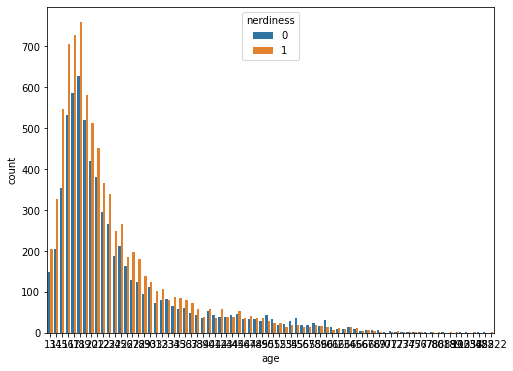

In [60]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='age', hue = train['nerdiness'])

In [61]:
age_counts = train['age'].value_counts()

age_counts

18     1386
17     1313
16     1239
19     1101
20      932
       ... 
77        1
99        1
81        1
336       1
80        1
Name: age, Length: 76, dtype: int64

In [62]:
age_counts.tail(10)

545      1
88       1
722      1
38822    1
100      1
77       1
99       1
81       1
336      1
80       1
Name: age, dtype: int64

336살 이상치 확인

-> 이상치 제거

In [63]:
#이상치 제거
#x_train = x_train.drop(x_train[x_train.age > 120].index)
#x_train = x_train.drop(x_train[x_train.age < 4].index)

#y_train = x_train.drop(x_train[x_train.age > 120].index)
#y_train = x_train.drop(x_train[x_train.age < 4].index)

#test = test.drop(test[test.age > 120].index)
#test = test.drop(test[test.age < 4].index)

## hand

<AxesSubplot:xlabel='hand', ylabel='count'>

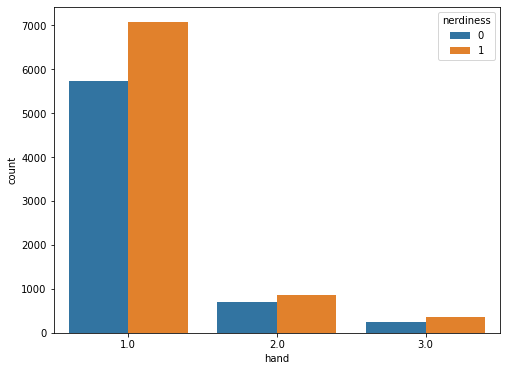

In [64]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='hand', hue = train['nerdiness'])

In [65]:
x_train.drop('hand', axis=1, inplace = True)
test.drop('hand', axis=1, inplace = True)


## religion

<AxesSubplot:xlabel='religion', ylabel='count'>

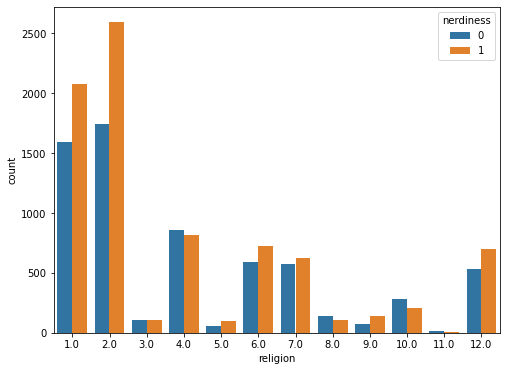

In [66]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='religion', hue = train['nerdiness'])

In [67]:
# 결측치 확인
x_train['religion'].isnull().sum()
test['religion'].isnull().sum()

483

In [68]:
#결측치 대체
x_train['religion'] = x_train['religion'].fillna(x_train['religion'].mean())
test['religion'] = test['religion'].fillna(test['religion'].mean())

In [69]:
# 결측치 확인
x_train['religion'].isnull().sum()

0

In [70]:
test['religion'].isnull().sum()

0

## orientation

<AxesSubplot:xlabel='orientation', ylabel='count'>

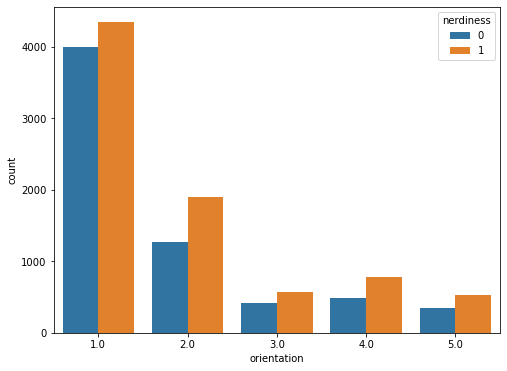

In [71]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='orientation', hue = train['nerdiness'])

In [72]:
# 결측치 확인
x_train['orientation'].isnull().sum()

399

In [73]:
#결측치 대체
x_train['orientation'] = x_train['orientation'].fillna(x_train['orientation'].mean())
test['orientation'] = test['orientation'].fillna(test['orientation'].mean())


In [74]:
# 결측치 확인
x_train['orientation'].isnull().sum()

0

## voted

<AxesSubplot:xlabel='voted', ylabel='count'>

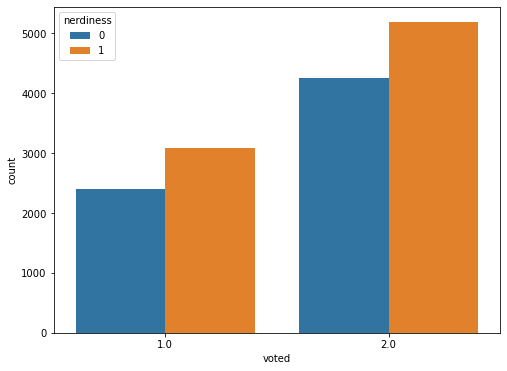

In [75]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='voted', hue = train['nerdiness'])

In [76]:
# 결측치 확인
x_train['voted'].isnull().sum()

85

In [77]:

x_train['voted'] = x_train['voted'].fillna(x_train['voted'].mean())
test['voted'] = test['voted'].fillna(test['voted'].mean())

In [78]:
# 결측치 확인
x_train['voted'].isnull().sum()

0

## married

<AxesSubplot:xlabel='married', ylabel='count'>

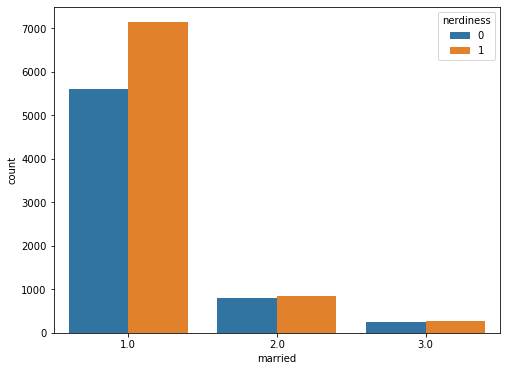

In [79]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='married', hue = train['nerdiness'])

In [80]:
# 결측치 확인
x_train['married'].isnull().sum()

82

In [81]:

x_train['married'] = x_train['married'].fillna(x_train['married'].mean())
test['married'] = test['married'].fillna(test['married'].mean())

In [82]:
# 결측치 재확인
x_train['married'].isnull().sum()

0

## familysize

<AxesSubplot:xlabel='familysize', ylabel='count'>

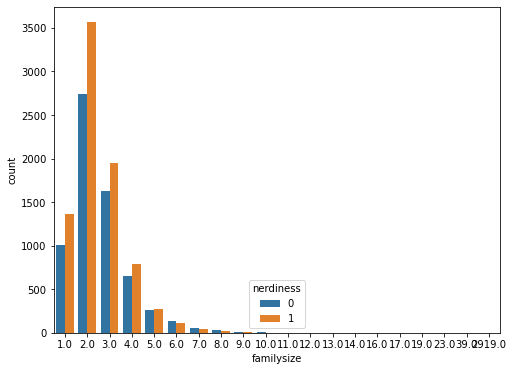

In [83]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='familysize', hue = train['nerdiness'])

<AxesSubplot:>

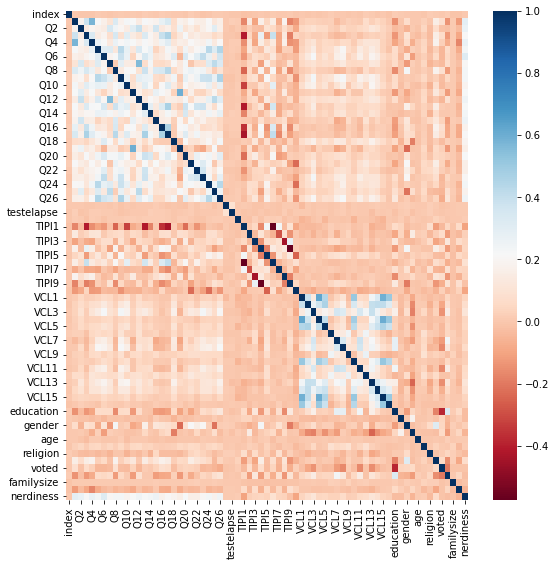

In [84]:
plt.figure(figsize=(9,9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

In [85]:
#이상치 제거
#x_train = x_train.drop(x_train[x_train.familysize > 50].index)
#test = test.drop(test[test.familysize > 50].index)

In [86]:
# 결측치 확인
x_train['familysize'].isnull().sum()

319

In [87]:
x_train['familysize'] = x_train['familysize'].fillna(x_train['familysize'].mean())
test['familysize'] = test['familysize'].fillna(test['familysize'].mean())

In [88]:
# 결측치 확인
x_train['familysize'].isnull().sum()

0

## ASD

<AxesSubplot:xlabel='ASD', ylabel='count'>

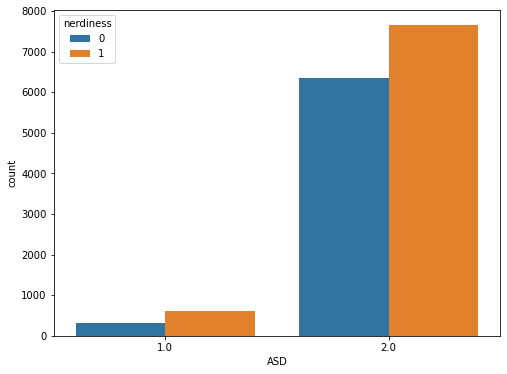

In [89]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='ASD', hue = train['nerdiness'])

In [90]:
# 결측치 확인
x_train['ASD'].isnull().sum()

89

In [91]:

x_train['ASD'] = x_train['ASD'].fillna(x_train['ASD'].mean())
test['ASD'] = test['ASD'].fillna(test['ASD'].mean())

In [92]:
# 결측치 재확인
x_train['ASD'].isnull().sum()

0

In [93]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [94]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
soft_vote.fit(x_train, y_train)

# x_train.info()

VotingClassifier(estimators=[('r1', RandomForestClassifier(n_estimators=500)),
                             ('r2', LGBMClassifier()),
                             ('r3', GradientBoostingClassifier())],
                 voting='soft')

In [95]:
model = soft_vote
pred_y = model.predict_proba(test)
pred_y = pred_y[:,1]

In [96]:
pred = soft_vote.predict(test)

In [98]:
submission = pd.read_csv('sample_submission.csv')
submission = pd.DataFrame({
    "nerdiness" : pred_y
})

submission.to_csv('model.csv', index=False)